In [ ]:
# plan
# 1. so far the listing data we have are all for used cars
# 2. can make use of the used_car ID to search for review link for a specific car model

In [13]:
# import packages
import bs4
from bs4 import BeautifulSoup
import requests as req
import pickle
import re
import pandas as pd
import numpy as np

In [14]:
# scrape review text
def scrape_review_data(url):
    
    # check running number
    print(url.split("=")[1])
    
    # Step1: form beautifulSoup from url
    html_text = req.get(url)
    soup = BeautifulSoup(html_text.content, "lxml")

    # Step2: get entire review page content
    review_text = soup.body.find('div', {'id':'content'}).get_text(strip=True)
    
    # Step3: extract relevant information
    model = review_text.partition('User Reviews')[2].partition('Price')[0].strip()
    if model == '':
        model = review_text.partition('User Review')[2].partition('Price')[0].strip()

    # Step4: extract like and dislike comments
    like_comment = None
    dislike_comment = None
    try:
        like_comment = soup.body.find('div', {'class':'like_box'}).text.replace('What We Like', ' ').strip().split('\n')
        like_comment = ' '.join(like_comment)
        dislike_comment = soup.body.find('div', {'class':'dislike_box'}).text.replace('What We Dislike', ' ').strip().split('\n')
        dislike_comment = ' '.join(dislike_comment)
    except:
        pass
    
    return model, review_text, like_comment, dislike_comment, url

In [15]:
# form a list of url
url_list = [r'https://www.sgcarmart.com/news/review.php?AID=%d' %(AID+1) for AID in range(2068)]
len(url_list)

2068

In [16]:
# check sample return
# NOTE: map can only release content once. Need to rerun after convert to list
result = map(scrape_review_data, url_list)
review_data = list(result)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


In [ ]:
# models = []
# reviews = []
# like_comments = []
# dislike_comments = []
# review_urls = []
# failed_attempt = 0
# failed_ID = []
# for url in url_list:
#     try:
#         result = scrape_review_data(url)
#         models.append(result[0])
#         reviews.append(result[1])
#         like_comments.append(result[2])
#         dislike_comments.append(result[3)
#         review_urls.append(result[4])
#     except:
#         failed_attempt += 1
#         failed_ID.append(url.split("=")[1])
#         pass

In [17]:
# convert lists to data frame
# df_review = pd.DataFrame(zip(models, reviews, like_comments, dislike_comments, review_urls), columns=['model', 'review_text', 'like_comment', 'dislike_comment', 'review_url'])
df_review = pd.DataFrame(review_data, columns=['model', 'review_text', 'like_comment', 'dislike_comment', 'review_url'])
df_review.head()

,model,review_text,like_comment,dislike_comment,review_url
0,Geely MK 1.5 (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,None,None,https://www.sgcarmart.com/news/review.php?AID=1
1,Daihatsu Sirion 1.5 Sports (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,None,None,https://www.sgcarmart.com/news/review.php?AID=2
2,Fiat Bravo 1.4 T-Jet Dynamic (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,None,None,https://www.sgcarmart.com/news/review.php?AID=3
3,Mazda 2 Hatchback 1.5 V (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,None,None,https://www.sgcarmart.com/news/review.php?AID=4
4,Suzuki SX4 Sedan 1.6 (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,None,None,https://www.sgcarmart.com/news/review.php?AID=5


In [18]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   model            2068 non-null   object
 1   review_text      2068 non-null   object
 2   like_comment     711 non-null    object
 3   dislike_comment  711 non-null    object
 4   review_url       2068 non-null   object
dtypes: object(5)
memory usage: 80.9+ KB


In [19]:
# save the dataframe as csv
df_review.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewdata.csv', index=True)

In [20]:
# define a function to get review rating url
def get_reviewrating_href(url):
    
    try:
        # construct BeautifulSoup
        html_text = req.get(url)
        soup = BeautifulSoup(html_text.content, 'lxml')

        # locate a-tag and extract as string
        rating_href = soup.body.find('div', {'id':'contentblank'}).find('div', {'id':'rightside_content'}).find('div', {'id':'car_information'}).find('div', {'class':'greybox_body newboxborder'}).find('div', {'class':'endside'}).select('div:nth-of-type(2)')[0].select('div:nth-of-type(1)')[0].find('table').find_all('a', string=True)
        # verify if the a-tag is a valid link for review rating
        if str(rating_href).find('CarCode') > 0:
            rating_href = 'https://www.sgcarmart.com' + str(rating_href[0]).partition('href=')[2].partition('>')[0].replace('"', "")

        return rating_href
    except:
        print('Exception' + url)
        return None
        pass

In [14]:
# # NOTE: Code below only need to run once after populating to a dataframe. Do change to your own repository
# # NOTE: Links can then be read from pd.read_csv
# # map the function to url_list
# reviewRating_links = list(map(get_reviewrating_href, url_list))
# cleaned_links = [None if link == [] else link for link in reviewRating_links]
# # save the href link to csv file
# valid_links = pd.DataFrame(cleaned_links, columns=['rating_href'])
# valid_links.rating_href = valid_links.rating_href.apply(lambda x: 'https://www.'+str(x) if x != None else None)
# valid_links.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewRatingLinks.csv')

https://www.sgcarmart.com/news/review.php?AID=14
https://www.sgcarmart.com/news/review.php?AID=15
https://www.sgcarmart.com/news/review.php?AID=17
https://www.sgcarmart.com/news/review.php?AID=22
https://www.sgcarmart.com/news/review.php?AID=37
https://www.sgcarmart.com/news/review.php?AID=56
https://www.sgcarmart.com/news/review.php?AID=57
https://www.sgcarmart.com/news/review.php?AID=58
https://www.sgcarmart.com/news/review.php?AID=60
https://www.sgcarmart.com/news/review.php?AID=61
https://www.sgcarmart.com/news/review.php?AID=65
https://www.sgcarmart.com/news/review.php?AID=67
https://www.sgcarmart.com/news/review.php?AID=68
https://www.sgcarmart.com/news/review.php?AID=69
https://www.sgcarmart.com/news/review.php?AID=76
https://www.sgcarmart.com/news/review.php?AID=82
https://www.sgcarmart.com/news/review.php?AID=83
https://www.sgcarmart.com/news/review.php?AID=85
https://www.sgcarmart.com/news/review.php?AID=90
https://www.sgcarmart.com/news/review.php?AID=93
https://www.sgcarmar

https://www.sgcarmart.com/news/review.php?AID=1216
https://www.sgcarmart.com/news/review.php?AID=1217
https://www.sgcarmart.com/news/review.php?AID=1218
https://www.sgcarmart.com/news/review.php?AID=1219
https://www.sgcarmart.com/news/review.php?AID=1222
https://www.sgcarmart.com/news/review.php?AID=1223
https://www.sgcarmart.com/news/review.php?AID=1226
https://www.sgcarmart.com/news/review.php?AID=1231
https://www.sgcarmart.com/news/review.php?AID=1237
https://www.sgcarmart.com/news/review.php?AID=1241
https://www.sgcarmart.com/news/review.php?AID=1243
https://www.sgcarmart.com/news/review.php?AID=1246
https://www.sgcarmart.com/news/review.php?AID=1252
https://www.sgcarmart.com/news/review.php?AID=1253
https://www.sgcarmart.com/news/review.php?AID=1256
https://www.sgcarmart.com/news/review.php?AID=1264
https://www.sgcarmart.com/news/review.php?AID=1266
https://www.sgcarmart.com/news/review.php?AID=1271
https://www.sgcarmart.com/news/review.php?AID=1272
https://www.sgcarmart.com/news/

In [54]:
def extract_review_rating(url):
    
    print(url)
    
    # set default rating as None
    overall, comfort, reliability, handling, features, exterior_styling, interior_design, value_for_money, engine_performance, exception = None, None, None, None, None, None, None, None, None, None
    
    if (url != None) | (url != 'NaN'):
        try:
            html_text = req.get(url)
            soup = BeautifulSoup(html_text.content, 'lxml')
            overall = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(2)')[0].find('table').find('tr').find('div').select('div:nth-of-type(1)')[0].text.strip()
            comfort = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(1)')[0].select('td:nth-of-type(3)')[0].text.strip()
            reliability = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(1)')[0].select('td:nth-of-type(6)')[0].text.strip()
            handling = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(3)')[0].select('td:nth-of-type(3)')[0].text.strip()
            features = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(3)')[0].select('td:nth-of-type(6)')[0].text.strip()
            exterior_styling = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(5)')[0].select('td:nth-of-type(3)')[0].text.strip()
            interior_design = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(5)')[0].select('td:nth-of-type(6)')[0].text.strip()
            value_for_money = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(7)')[0].select('td:nth-of-type(3)')[0].text.strip()
            engine_performance = soup.body.find('div', {'id':'content'}).find('div', {'id':'contentblank'}).find('div', {'id':'maincontent'}).find('div', {'class':'mainright'}).find('div', {'class':'mainrightblank'}).select('div:nth-of-type(7)')[0].find('div',{'class':'newboxborder'}).next_sibling.next_sibling.find('table').find('tr').select('td:nth-of-type(4)')[0].find('table').select('tr:nth-of-type(7)')[0].select('td:nth-of-type(6)')[0].text.strip()
            
        except:
            print("EXCEPTION")
            exceptions = url
            overall, comfort, reliability, handling, features, exterior_styling, interior_design, value_for_money, engine_performance = None, None, None, None, None, None, None, None, None
            pass
    
    return overall, comfort, reliability, handling, features, exterior_styling, interior_design, value_for_money, engine_performance, exception

In [52]:
valid_links = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewRatingLinks.csv', usecols=lambda x: x != 'Unnamed: 0')

In [55]:
# read in the dataframe with reviewRating_href
valid_links = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewRatingLinks.csv', usecols=lambda x: x != 'Unnamed: 0')
rating_data = list(map(extract_review_rating, list(valid_links.rating_href)))

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10504
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10038
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10469
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10485
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10488
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10150
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10323
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10511
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10442
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10515
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10475
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10502
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10445
nan
EXCEPTION
nan
EXCEPTION
nan
E

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10589
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10488
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10782
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10555
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10506
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10489
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10473
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10815
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10575
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10808
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10806
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10356
https://www.sgcarmart.com/new_ca

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10836
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11080
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10450
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10513
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10240
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10802
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10980
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10972
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11002
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11008
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10255
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10751
https://www.sgcarmart.com/new_cars/n

nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11187
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10941
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11191
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11167
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10980
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10630
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11197
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11189
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11167
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11170
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11195
https://www.sgcarmart.com/new

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11414
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11306
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10753
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11391
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11420
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10942
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11419
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11299
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11437
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11438
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10975
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10960
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=10895
https://w

nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11100
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11450
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11584
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11601
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11647
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11623
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11659
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11623
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11007
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11661
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11651
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11639
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11552
https://www.sgcarmart.com/n

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11829
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11739
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11806
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11853
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11293
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11720
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11602
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11853
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11802
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11608
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11818
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_review

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11799
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12076
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11933
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12045
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12049
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12017
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11865
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11900
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11933
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11986
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12077
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11933
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION


https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12233
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12265
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11806
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11625
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12098
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12227
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11650
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12297
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11676
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12279
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11262
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.ph

EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12561
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12568
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12450
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12553
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12343
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11806
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12553
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12518
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12247
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12265
https://www.sgcarmart.com/new_cars/newcars_reviews.php?Car

nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12775
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12267
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12771
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12749
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12631
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12772
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12645
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12769
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12077
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12534
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12645
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12073
EXCEPTION
https://www.

https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=11676
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12720
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12835
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12935
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12812
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12897
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12946
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12903
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12816
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12816
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12835
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12946
EXCEPTION
https://www.sgcarmart.com/new_cars/new

EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12836
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=21608
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12651
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=21575
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=21615
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=21483
nan
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=21483
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12128
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12962
EXCEPTION
https://www.sgcarmart.com/new_cars/newcars_reviews.php?CarCode=12962
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
nan
EXCEPTION
https://www.sgcarmart.co

In [62]:
# read in the saved reviews and ratings datasets
# ratings = pd.DataFrame(zip(overall_list, comfort_list, reliability_list, handling_list, features_list, exterior_styling_list, interior_design_list, value_for_money_list, engine_performance_list), 
#                        columns = ['overall', 'comfort', 'reliability', 'handling', 'features', 'exterior_styling', 'interior_design', 'value_for_money', 'engine_performance'])
ratings = pd.DataFrame(rating_data, 
                      columns = ['overall', 'comfort', 'reliability', 'handling', 'features', 'exterior_styling', 'interior_design', 'value_for_money', 'engine_performance', 'exception'])
ratings.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewratings.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   overall             894 non-null    object
 1   comfort             894 non-null    object
 2   reliability         894 non-null    object
 3   handling            894 non-null    object
 4   features            894 non-null    object
 5   exterior_styling    894 non-null    object
 6   interior_design     894 non-null    object
 7   value_for_money     894 non-null    object
 8   engine_performance  894 non-null    object
 9   exception           0 non-null      object
dtypes: object(10)
memory usage: 161.7+ KB


In [63]:
ratings.head()

,overall,comfort,reliability,handling,features,exterior_styling,interior_design,value_for_money,engine_performance,exception
0,3.0,3.5,2.5,3.0,2.5,3.0,3.0,3.5,2.5,None
1,3.5,3.5,3.5,3.0,3.0,3.5,3.0,4.0,3.5,None
2,4.0,4.0,3.5,4.0,3.5,4.0,4.0,3.5,4.0,None
3,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,None
4,4.0,4.5,4.0,4.0,3.5,3.5,4.0,4.0,3.5,None


In [64]:
# combine the review text and rating into one dataframe
reviews = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewdata.csv', usecols=lambda x: x != 'Unnamed: 0')
ratings = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewratings.csv', usecols=lambda x: x != 'Unnamed: 0')

In [65]:
reviews.head()

,model,review_text,like_comment,dislike_comment,review_url
0,Geely MK 1.5 (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=1
1,Daihatsu Sirion 1.5 Sports (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=2
2,Fiat Bravo 1.4 T-Jet Dynamic (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=3
3,Mazda 2 Hatchback 1.5 V (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=4
4,Suzuki SX4 Sedan 1.6 (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=5


In [66]:
ratings.head()

,overall,comfort,reliability,handling,features,exterior_styling,interior_design,value_for_money,engine_performance,exception
0,3.0,3.5,2.5,3.0,2.5,3.0,3.0,3.5,2.5,NaN
1,3.5,3.5,3.5,3.0,3.0,3.5,3.0,4.0,3.5,NaN
2,4.0,4.0,3.5,4.0,3.5,4.0,4.0,3.5,4.0,NaN
3,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,NaN
4,4.0,4.5,4.0,4.0,3.5,3.5,4.0,4.0,3.5,NaN


In [67]:
# concatenate the two datasets
df = pd.concat([reviews, ratings], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model               1316 non-null   object 
 1   review_text         2068 non-null   object 
 2   like_comment        711 non-null    object 
 3   dislike_comment     683 non-null    object 
 4   review_url          2068 non-null   object 
 5   overall             894 non-null    float64
 6   comfort             894 non-null    float64
 7   reliability         894 non-null    float64
 8   handling            894 non-null    float64
 9   features            894 non-null    float64
 10  exterior_styling    894 non-null    float64
 11  interior_design     894 non-null    float64
 12  value_for_money     894 non-null    float64
 13  engine_performance  894 non-null    float64
 14  exception           0 non-null      float64
dtypes: float64(10), object(5)
memory usage: 242.5+ KB


In [68]:
# export the combined dataset
df.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_Review_Rating.csv')

In [72]:
# read in complete review-rating dataset
df = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_Review_Rating.csv', usecols=lambda x : x not in ['Unnamed: 0', 'exception'])
df.isna().sum()

model                  752
review_text              0
like_comment          1357
dislike_comment       1385
review_url               0
overall               1174
comfort               1174
reliability           1174
handling              1174
features              1174
exterior_styling      1174
interior_design       1174
value_for_money       1174
engine_performance    1174
dtype: int64

<AxesSubplot:>

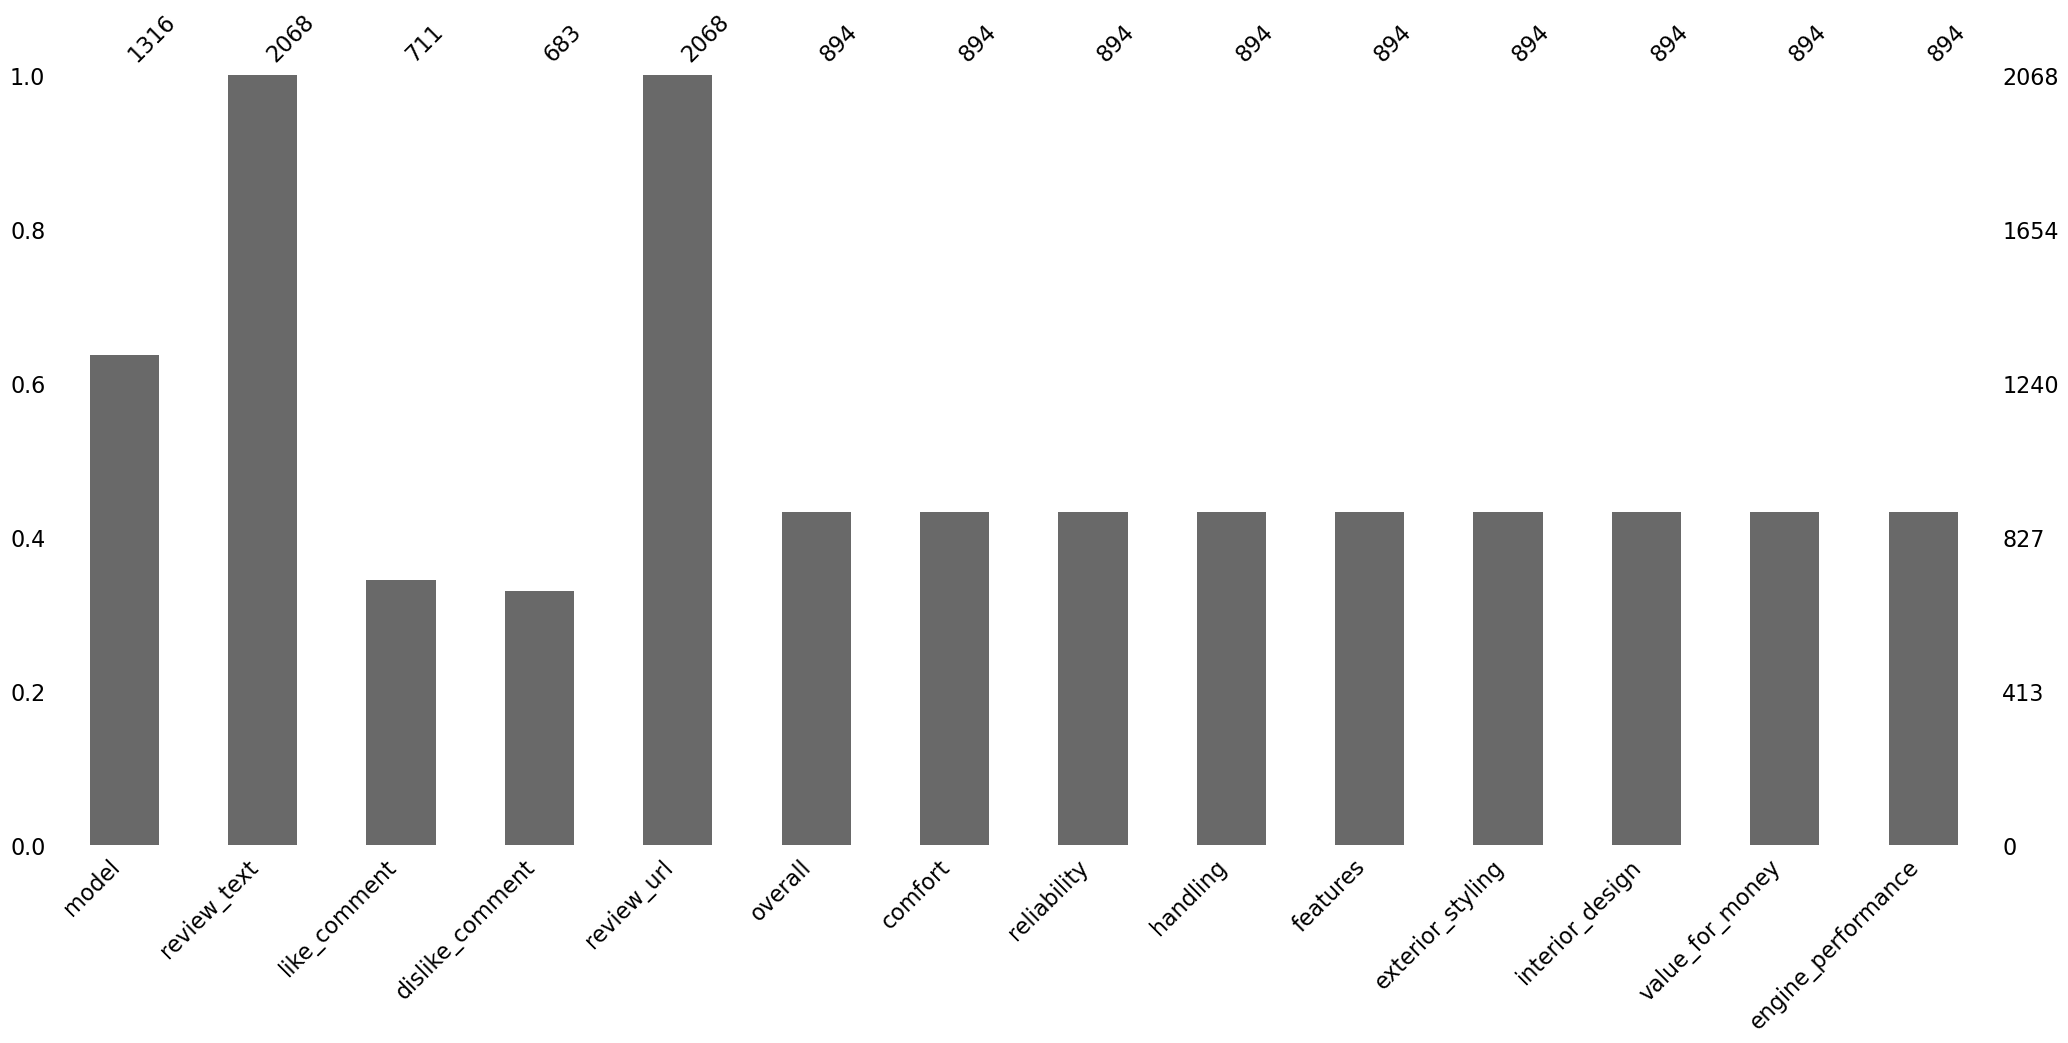

In [73]:
# visualize sparsity
import missingno as msno
msno.bar(df)

<AxesSubplot:>

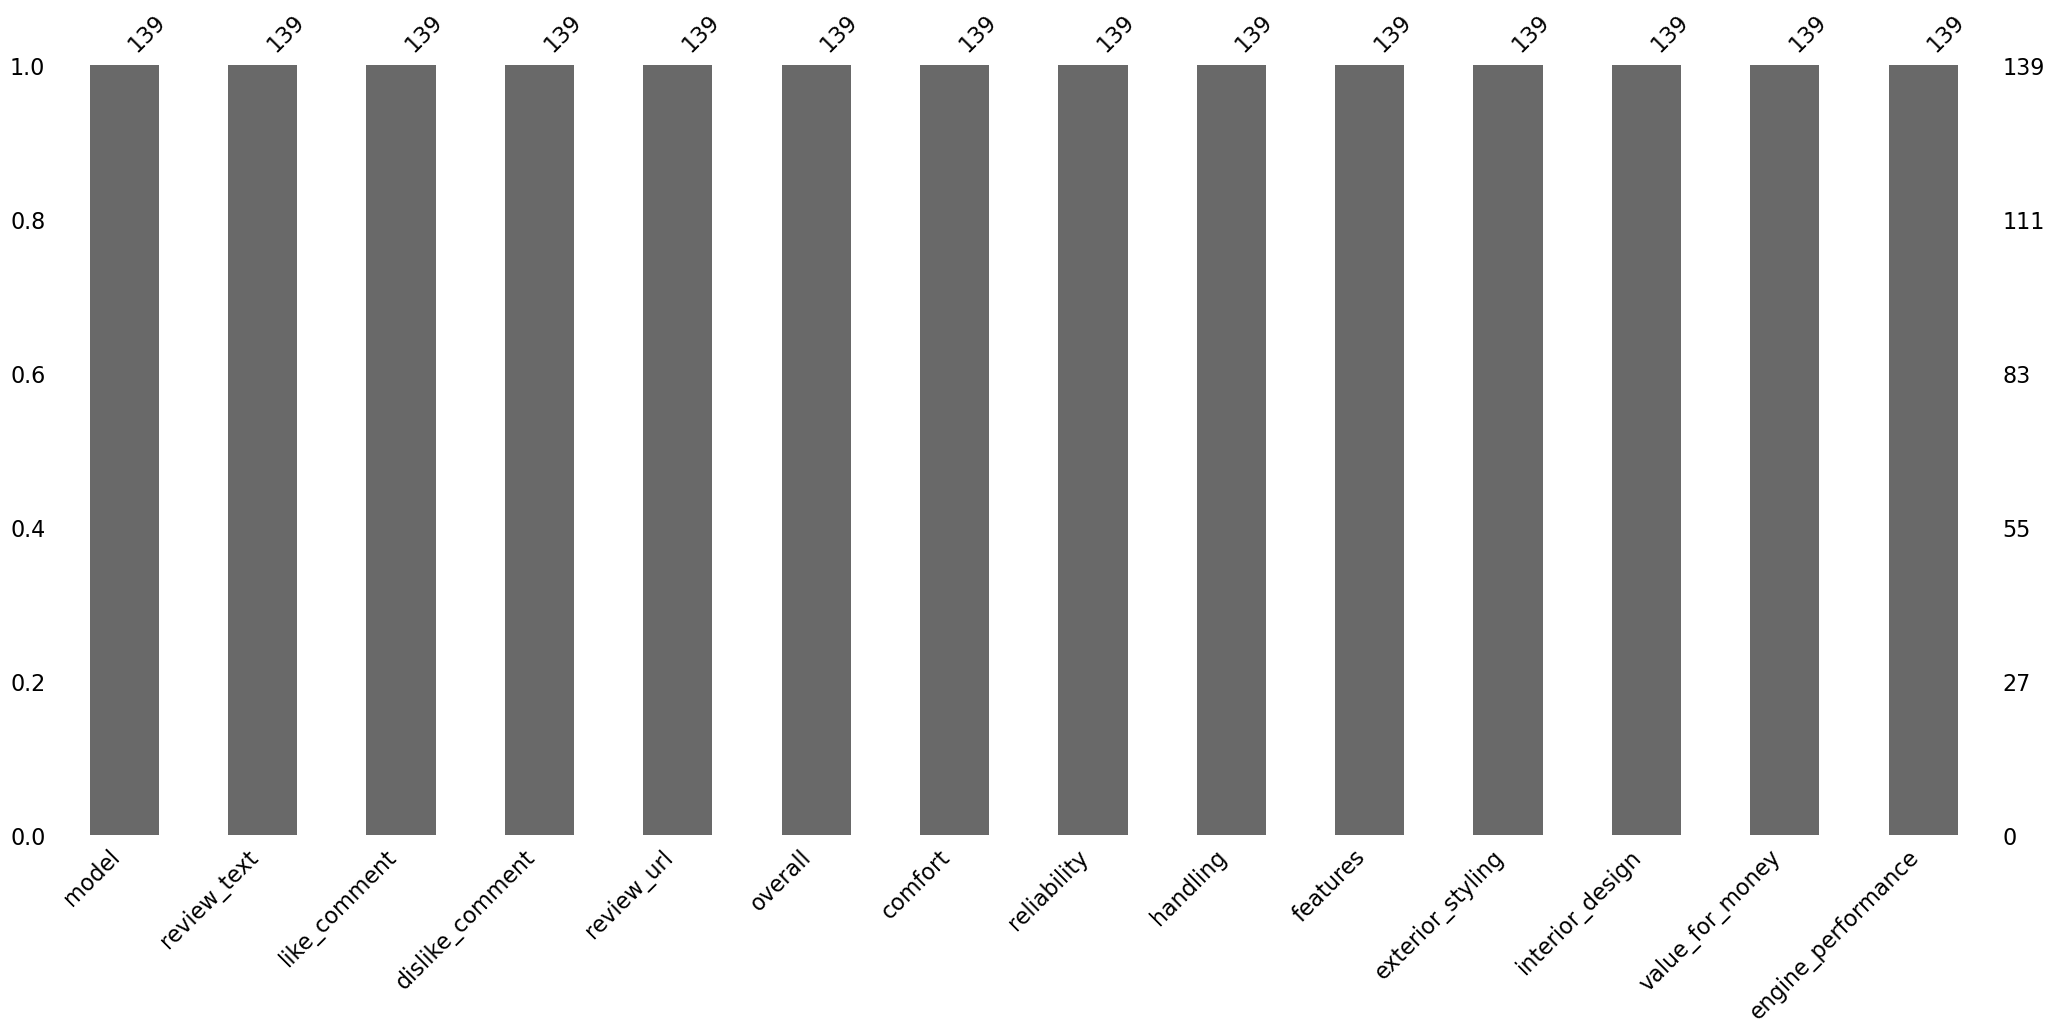

In [74]:
df_cleaned = df.dropna(axis=0, how='any')
msno.bar(df_cleaned)

In [78]:
# scrape more data for car model name
url = r'https://www.sgcarmart.com/news/review.php?AID=2067'

html = req.get(url)
soup = BeautifulSoup(html.content, 'lxml')

model = soup.body.find('div', {'id': 'contentblank'}).find('div', {'id':'rightside_content'}).select('div:nth-of-type(1)')[0].get_text(strip=True).split("Car Review -")[1]

print(model.strip())

Mercedes-Benz SL-Class Cabriolet SL55 AMG 4MATIC+ (A)


In [112]:
def rescrape_car_model(url):
    html = req.get(url)
    soup = BeautifulSoup(html.content, 'lxml')
    
    # check for specific text content
    try:
        model = soup.body.find('div', {'id': 'contentblank'}).find('div', {'id':'rightside_content'}).select('div:nth-of-type(1)')[0].get_text(strip=True)
        if model.find('Car Review') >= 0:
            model = model.split("Car Review -")[1].strip()
        elif model.find('Short Drive') >= 0:
            model = model.split("Short Drive - ")[1].strip()
        elif model.find('Comparison Test') >= 0:
            model = None
    except:
        model = None
        pass
    print(url.split("=")[1] + '. ' + str(model))
    return model    

In [97]:
url_list[29]

'https://www.sgcarmart.com/news/review.php?AID=30'

In [113]:
url_list = [r'https://www.sgcarmart.com/news/review.php?AID=%d' %(AID+1) for AID in range(2068)]

models = list(map(rescrape_car_model, url_list))

1. Geely MK 1.5
2. Daihatsu Sirion Sports 1.5
3. Fiat Bravo T-Jet 1.4
4. Mazda 2 1.5 (A)
5. Suzuki SX4 1.6 (A)
6. Kia Picanto 1.1
7. Daihatsu Terios 4WD
8. Alfa Romeo Spider 2.2 Selespeed
9. Mitsubishi Lancer Evolution X
10. Volkswagen Caddy 1.9 TDI
11. Chery V5 Crossover 2.4
12. Ford S Max 2.3
13. Volkswagen Golf GT 1.4 Sport
14. MINI Cooper S 1.6 JCW
15. Subaru Impreza 5D 2.0 S-GT
16. Subaru WRX 2.5 (M) 2007 vs WRX 2.5 (M) 5 door 2008
17. Ford Mondeo 2.3 Trend
18. Skoda Roomster 1.6
19. Renault Grand Espace 2.0T
20. Toyota Mark X Zio 2.4 G
21. Hyundai Accent 1.4 GLS 3dr
22. Nissan GT-R 3.8 Twin-Turbo
23. Mitsubishi Delica D5
24. Volvo S80 T6
25. Nissan March 1.4
26. Chery A1 1.3 5Dr
27. Audi R8 4.2
28. Toyota Corolla Altis 2008
29. MINI Cooper S Clubman 1.6
30. None
31. Ssangyong Actyon Sports 2.0
32. Volkswagen Passat 1.8 TSI
33. Nissan Dualis 2.0
34. Citroen C4 Picasso 2.0
35. Triple Drive - Honda Accord 2.0, 2.4 and 3.5L-V6
36. Opel Astra Sedan 1.8
37. BMW M3
38. Hyundai i30
39. C

264. X-Series - Mazda CX-7 2.3 (A), Mazda MX-5 2.0 (A) & Mazda RX-8 1.3 (A)
265. Volvo XC90 3.2 R-Design (A)
266. Mercedes-Benz C-Class C200 CGI Saloon 1.8 (A)
267. BMW X5 3.0 (A)
268. Special Feature - Mitsubishi Evolution X 2.0 GSR Limited Edition (M)
269. Ford Mondeo 2.3 (A)
270. Volvo XC60 2.0T (A)
271. Volkswagen Passat CC 2.0 Sport TSI DSG (A)
272. Alfa Romeo 159 2.2 Selespeed Quadrifoglio Verde (A)
273. Mitsubishi Delica D:5 2.0 (A)
274. Renault Kangoo WAV 1.6 (A)
275. Honda Stream RSZ 1.8 (A)
276. Volkswagen Touareg V6 3.6 (A)
277. Lexus IS250 2.5 Premium (A)
278. Audi Q5 2.0 TFSI Quattro S-tronic (A)
279. Mazda CX-7 2.3 DISI Turbo (A)
280. Chery H5 2.0 (M)
281. BMW 320i Coupe 2.0 (A)
282. Lexus RX450h 3.5 (A)
283. Mazda MX-5 2.0 (A)
284. Ford Kuga 2.5 (A)
285. Toyota Wish 1.8 CVT (A)
286. Porsche Cayenne S Hybrid (A)
287. Lexus RX270 2.7 Luxury (A)
288. Volvo S80 2.0T (A)
289. Special Feature - Holden HSV GTS (A)
290. Lexus IS F 5.0 V8 (A)
291. Lexus GS450h Hybrid 3.5 Luxury (

478. Audi S5 Cabriolet 3.0 TFSI quattro S-tronic (A)
479. BMW 3 Series Sedan 328i Luxury (A)
480. Toyota Camry 2012 2.5 (A)
481. Volvo XC90 T5 Refresh (A)
482. Audi S5 Coupe 3.0 TFSI quattro S-tronic (A)
483. Audi A5 Coupe 2.0 TFSI quattro S-tronic (A)
484. Mercedes-Benz M-Class ML350 BlueEFFICIENCY4MATIC (A)
485. Subaru Impreza 1.6 (A)
486. Chrysler Grand Voyager 2.8 TDi (A)
487. Jeep Wrangler Sahara 3.6 V6 (A)
488. First Drive - Mercedes-Benz A-Class A220 CDI (A)
489. Porsche Boxster S 3.4 (A)
490. Facelift - Honda Odyssey 2.4 EXV (A) Facelift
491. Cover Story - Toyota 86 2.0 GS (M)
492. None
493. Opel Astra GTC 1.4 Turbo Panoramic Roof (A)
494. BMW M Series M6 Convertible 4.4 (A)
495. Ferrari California 30 4.3 (A)
496. BMW ActiveHybrid 5 (A)
497. Opel Astra Sports Tourer 1.4 Turbo (A)
498. BMW 6 Series Gran Coupe 640i (A)
499. Opel Zafira Tourer 1.4 Turbo Panoramic Roof (A)
500. Volkswagen CrossPolo 1.2 TSI DSG (A)
501. Facelift - Lexus RX450h Hybrid 3.5 Luxury (A)
502. Facelift - H

667. First Drive - BMW 7 Series 730d xDrive (A)
668. Chrysler 300C Diesel 3.0 Luxury (A)
669. First Drive - BMW i3 (A)
670. Toyota Avanza 1.5 (A)
671. First Drive - Citroen Grand C4 Picasso 2.0 BlueHDi 150 (A)
672. Comparison - Mazda6 2.5 R (A) & Nissan Teana 2.5 (A) & Toyota Camry 2.5 (A)
673. Nissan Teana 2.5 (A)
674. First Drive - Lexus ES300h Hybrid 2.5 (A)
675. Mercedes-Benz A-Class A 45 AMG (A)
676. Facelift - Chevrolet Cruze 1.4 Turbo (A)
677. Opel Astra GTC 1.6 Turbo (A)
678. Nissan Teana 2.0 (A)
679. Land Rover Range Rover Sport 3.0 S/C HSE Dynamic (A)
680. Lexus ES300h Hybrid 2.5 Luxury (A)
681. Bentley Flying Spur 6.0 (A)
682. Audi A8 4.0 TFSI quattro Tip LWB (A)
683. Lexus ES250 2.5 Luxury (A)
684. Jaguar F-TYPE 5.0 S V8 (A)
685. Mercedes-Benz S-Class Hybrid S400L (A)
686. Citroen DS5 Diesel 1.6 e-HDi ETG (A)
687. Facelift - Peugeot RCZ 1.6 Turbo (A)
688. Facelift - Kia Optima K5 2.4 (A)
689. Facelift - BMW M Series M5 Sedan 4.4 Competition (A)
690. Citroen C5 Diesel 1.6 e-

846. Peugeot 308 1.2 PureTech EAT6 Allure (A)
847. First Drive - Suzuki Vitara 1.6 AllGrip (A)
848. Volvo S60 T5 Drive-E (A)
849. Jeep Cherokee 2.4 Trailhawk (A)
850. Alfa Romeo 4C 1.8 Turbo TCT (A)
851. Mazda2 Hatchback 1.5 Deluxe (A)
852. Facelift - Porsche Cayenne S 3.6 (A)
853. MINI Cooper S 5 Door 2.0 (A)
854. Comparison - Mazda2 Hatchback 1.5 Deluxe (A) & Nissan Note 1.2 DIG-S (A)
855. Facelift - Audi A7 Sportback 2.0 TFSI S-tronic (A)
856. Facelift - Porsche Cayenne Diesel 3.0 (A)
857. Lexus RC F 5.0 V8 (A)
858. Kia Sorento 2.4 SX GDI (A)
859. Subaru Outback 2.5i-S (A)
860. Comparison - BMW M Series M4 Coupe 3.0 (A) & Lexus RC F 5.0 V8 (A)
861. Opel Meriva 1.4 Turbo (A)
862. First Drive - Porsche 911 Targa 4 GTS PDK 3.8 (A)
863. BMW 2 Series Convertible 220i Sport (A)
864. Ferrari California T 3.8 (A)
865. Kia Carens 2.0 GDI (A)
866. Porsche Boxster GTS PDK 3.4 (A)
867. Audi R8 Spyder 4.2 FSI quattro S-tronic
868. Citroen C4 Cactus 1.2 PureTech Shine Edition (A)
869. First Drive

1024. First Drive - Volkswagen Tiguan 2.0 TDI DSG (A)
1025. Facelift - Jaguar XJ 3.0 V6 Supercharged Premium Luxury LWB (A)
1026. Facelift - Peugeot 208 1.2 PureTech EAT6 (A)
1027. First Drive - Mercedes-Benz C-Class Cabriolet C63 S AMG (A)
1028. First Drive - Porsche Cayenne S E-Hybrid 3.0 (A)
1029. MINI Cooper Convertible 1.5 (A)
1030. First Drive - Mercedes-Benz C-Class Cabriolet C43 AMG (A)
1031. MINI Cooper S Convertible 2.0 (A)
1032. First Drive - Mercedes-Benz C-Class Cabriolet C300 (A)
1033. Audi A4 2.0 TFSI S-tronic Design (A)
1034. Comparison - Volkswagen Passat Variant 2.0 TSI DSG R-Line & Volvo V60 T5 Drive-E
1035. Mercedes-Benz C-Class Coupe C180 (A)
1036. Toyota Fortuner 2.7 (A)
1037. Honda Jade 1.5 RS VTEC Turbo (A)
1038. Facelift - Ford Focus Hatchback 1.0 Titanium (A)
1039. Kia Sportage 2.0 2WD (A)
1040. Volkswagen Passat 2.0 TSI R-Line (A)
1041. Facelift - Volkswagen Golf 1.2 TSI DSG (A)
1042. First Drive - Porsche 718 Boxster S PDK 2.5 (A)
1043. Comparison - Peugeot 

1196. Honda Civic Hatchback 1.5 VTEC Turbo (A)
1197. Subaru XV 1.6i-S (A)
1198. Audi Q2 1.0 TFSI S-tronic (A)
1199. Mazda CX-5 2.5 Super Luxury (A)
1200. Maserati Levante Diesel 3.0 V6 Sports Pack (A)
1201. Comparison - Mazda CX-5 2.5 & Toyota Harrier 2.0 & Volkswagen Tiguan 2.0
1202. Renault Kadjar 1.2T TCe (A)
1203. First Drive - Mercedes-Benz GLC-Class GLC200 (A)
1204. Audi Q5 2.0 TFSI quattro (A)
1205. Porsche Macan Turbo PDK 3.6 Performance Package (A)
1206. First Drive - Ferrari GTC4Lusso 6.3 (A)
1207. Mercedes-Benz C-Class Coupe C63 S AMG (A)
1208. Facelift - Toyota Corolla Altis 1.6 Elegance (A)
1209. BMW 4 Series Gran Coupe 420i Sport (A)
1210. First Drive - Ferrari 812 Superfast 6.5 V12 (A)
1211. First Drive - Lexus LS500h Hybrid 3.5 Luxury (A)
1212. Mercedes-Benz E-Class Estate E43 AMG 4MATIC (A)
1213. Comparison - Honda Civic 1.6 i-VTEC & Toyota Corolla Altis 1.6 Elegance
1214. Audi A5 Sportback 2.0 TFSI qu S-tronic Sport (A)
1215. First Drive - Lexus LS Turbo LS500 V6 3.5 

1364. Toyota Prius+ Hybrid 1.8 (A)
1365. Comparison - Honda Jazz 1.5 RS & Seat Ibiza 1.0 EcoTSI DSG & Suzuki Swift 1.0
1366. Facelift - Honda Jazz 1.5 RS (A)
1367. Volvo V40 T4 R-Design (A)
1368. Facelift - Mazda6 2.5 Luxury (A)
1369. Kia Cerato 1.6 SX (A)
1370. None
1371. Hyundai i30 Wagon 1.4 GLS DCT Turbo (A)
1372. First Drive - MINI John Cooper Works Convertible 2.0 (A)
1373. First Drive - Hyundai Santa Fe 2.2 R CRDi GLS (A)
1374. Ferrari GTC4Lusso T 3.9 (A)
1375. First Drive - Hyundai Santa Fe 2.4 GDI GLS
1376. First Drive - Lexus UX 200 2.0 Luxury (A)
1377. First Drive - Lexus UX 250h 2.0 Luxury (A)
1378. Porsche 911 Carrera T PDK 3.0 (A)
1379. Comparison - Honda Civic 1.6 i-VTEC LX (A) & Skoda Octavia 1.0 TSI Ambition Plus (A)
1380. First Drive - BMW X5 xDrive40i
1381. Skoda Superb 2.0 TSI Laurin & Klement (A)
1382. Infiniti QX30 2.0T Sport (A)
1383. Facelift - Volkswagen Golf Variant 1.4 TSI DSG (A)
1384. Renault Zoe Electric 5-door (A)
1385. Renault Megane RS 1.8T TCe (A)
1386

1533. Facelift - BMW X1 xDrive25i M Sport (A)
1534. Facelift - BMW 7 Series 740Li Pure Excellence (A)
1535. Facelift - BMW X1 xDrive25d xLine (A)
1536. Toyota GR Supra 3.0 (A)
1537. Volvo S60 T4 R-Design (A)
1538. Subaru Forester 2.0i-S EyeSight (A)
1539. Comparison - Audi A4 & Mercedes-Benz C-Class & Volvo S60
1540. Volvo S60 T5 R-Design (A)
1541. Honda Accord 1.5 VTEC Turbo (A)
1542. Audi TT Coupe 2.0 TFSI S tronic (A)
1543. Facelift - Seat Ibiza 1.0 EcoTSI DSG Style Plus (A)
1544. First Drive - BMW M Series X3 M Competition (A)
1545. Video Review - Mercedes-Benz CLA-Class CLA200 Coupe AMG Line (A)
1546. First Drive - BMW M Series X4 M Competition (A)
1547. Video Review - Skoda Octavia 2.0 TSI RS 245 (A)
1548. First Drive - BMW 1 Series 118i M Sport (A)
1549. Comparison - Honda Accord & Mazda6 & Toyota Camry
1550. BMW 1 Series Hatchback 118i M Sport (A)
1551. First Drive - Mercedes-Benz GLB-Class GLB200 (A)
1552. Facelift - Lexus 3-Row RX 350L 3.5 Premium 7-seater (A)
1553. Video Rev

1691. Video Review - Honda City 1.5 RS i VTEC (A)
1692. Facelift - Lexus IS 300 2.0 (A)
1693. Facelift - Audi A5 Cabriolet Mild Hybrid 2.0 TFSI S tronic Advanced (A)
1694. Ferrari F8 Spider 3.9 V8 (A)
1695. Facelift - Cupra Ateca 2020 2.0 TSI DSG (A)
1696. Mazda CX-30 Mild Hybrid 2.0 SkyActiv-X Luxury (A)
1697. Video Review - Hyundai Avante 1.6 Elite (A)
1698. Video Review - Kia Seltos 1.4 SX (A)
1699. Facelift - BMW 5 Series Sedan Mild Hybrid 530i M Sport (A)
1700. Video Review - Mercedes-Benz GLB-Class GLB200 Progressive 7-Seater (A)
1701. Video Review - Audi RS5 Sportback 2.9 TFSI qu Tip (A)
1702. Video Review - Lexus IS 300 2.0 (A)
1703. Facelift - Audi S4 Sedan 3.0 TFSI qu Tip (A)
1704. None
1705. Facelift - Lexus IS 300h Hybrid 2.5 Luxury (A)
1706. Suzuki Swift Mild Hybrid 1.2 Standard Two-Tone (A)
1707. Video Review - Volkswagen T-Cross 1.0 TSI DSG R-Line (A)
1708. Comparison - Hyundai Avante & Mazda 3 Sedan & Toyota Corolla Altis
1709. Facelift - Mercedes-Benz E-Class Saloon E2

1843. Honda Civic 1.5 VTEC Turbo (A)
1844. Suzuki Ignis Mild Hybrid 1.2 Standard (A)
1845. Facelift - Volkswagen Tiguan 2.0 TSI DSG Elegance (A)
1846. Morgan Plus Four 2.0 (A)
1847. Facelift - Lexus ES 300h Hybrid 2.5 Luxury
1848. Facelift - Hyundai Santa Fe Hybrid 1.6 Turbo 7-Seater Sunroof (A)
1849. Audi S3 Sedan 2.0 TFSI qu S tronic (A)
1850. Video Review - Jaguar E-PACE Mild Hybrid 1.5 SE (A)
1851. First Drive - BMW 4 Series Gran Coupe M440i Mild Hybrid (A)
1852. Facelift - MINI John Cooper Works 3-Door 2.0 (A)
1853. First Drive - BMW 2 Series Coupe M240i (A)
1854. Bike Review - Harley-Davidson Fat Boy
1855. Renault Arkana Fastback E-Tech Hybrid Bose Edition 1.6 (A)
1856. Bike Review - Harley-Davidson Street Bob
1857. Video Review - Toyota Camry Hybrid 2.5 Elegance (A)
1858. Video Review - Honda Civic 1.5 VTEC Turbo (A)
1859. Facelift - Lexus ES 250 2.5 F Sport (A)
1860. Lamborghini Huracan STO 5.2 V10 RWD (A)
1861. Tesla Model 3 Electric Performance AWD (A)
1862. Bike Review - BMW

1996. Opel Combo-e Electric 50 kWh (A)
1997. Bike Review - BMW CE 04
1998. Video Review - Skoda Kodiaq RS 2.0 TSI 7-Seater (A)
1999. Toyota Sienta Hybrid 1.5 Elegance (A)
2000. Lexus NX 350 2.4 F Sport (A)
2001. Video Review - Fiat 500 Coupe 0.9 TwinAir Turbo (A)
2002. Comparison - Lexus NX 350 F Sport 2.4 (A) vs Audi Q5 2.0 (A) vs BMW X3 xDrive30i (A)
2003. Video Review - Mazda CX-5 2.0 Luxury Sports (A)
2004. Comparison - Volvo XC60 Mild Hybrid B5 R-Design 2.0 (A) and Jaguar F-PACE 2.0 SE (A)
2005. Facelift - Volvo XC60 B5 Mild Hybrid 2.0 (A)
2006. Video Review - Audi SQ5 Sportback 3.0 TFSI qu Tip (A)
2007. First Drive - BMW X7 xDrive40i (A)
2008. Facelift - Volvo XC40 Recharge Plus Electric Plus 69 kWh (A)
2009. Video Review - Mercedes-Benz EQS Electric EQS450+ AMG Line 107.8 kWh (A)
2010. First Drive - BMW i7 xDrive60 (A)
2011. First Drive - BMW 7 Series 760i xDrive (A)
2012. Video Review - Audi A3 Sedan Mild Hybrid 1.0 TFSI S tronic (A)
2013. Video Review - Toyota Sienta Hybrid 1.

In [130]:
# export the models to dataframe
models_df = pd.DataFrame(models, columns=['car_model'])
models_df.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewcarmodels.csv')

In [168]:
# read in the csv file
df_models = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewcarmodels.csv', usecols=lambda x: x!= 'Unnamed: 0')

In [169]:
df_models

,car_model
0,Geely MK 1.5
1,Daihatsu Sirion Sports 1.5
2,Fiat Bravo T-Jet 1.4
3,Mazda 2 1.5 (A)
4,Suzuki SX4 1.6 (A)
...,...
2063,Skoda Octavia Mild Hybrid 1.0 TSI e-TEC Style (A)
2064,Video Review - BMW i4 M50 Gran Coupe Electric ...
2065,Facelift - Audi Q3 Sportback Mild Hybrid 1.5 T...
2066,Mercedes-Benz SL-Class Cabriolet SL55 AMG 4MAT...


In [170]:
# text cleaning - 1: find '**Review** - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('Review') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('Review') >= 0), 'car_model'] = df_models_selected

In [173]:
# text cleaning - 2: find '**Comparison - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('Comparison') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('Comparison') >= 0), 'car_model'] = df_models_selected

In [176]:
# text cleaning - 3: find '**Preview - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('Preview') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('Preview') >= 0), 'car_model'] = df_models_selected

In [177]:
# text cleaning - 4: find '**First Drive - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('First Drive') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('First Drive') >= 0), 'car_model'] = df_models_selected

In [179]:
# text cleaning - 5: find '**Special Features - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('Special Feature') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
print(df_models_selected.shape[0])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('Special Feature') >= 0), 'car_model'] = df_models_selected

10


In [186]:
# text cleaning - 6: find '**Face Lift - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('Facelift -') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
print(df_models_selected.shape[0])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('Facelift') >= 0), 'car_model'] = df_models_selected

251


In [187]:
# text cleaning - 7: find '**X-Series - '
df_models_selected = df_models[df_models.car_model.apply(lambda x : str(x).find('X-Series - ') >= 0)].car_model.apply(lambda x : str(x).split("-", 1)[1])
print(df_models_selected.shape[0])
df_models.loc[df_models.car_model.apply(lambda x : str(x).find('X-Series') >= 0), 'car_model'] = df_models_selected

1


In [194]:
# text cleaning - 8: trim the text
df_models.car_model = df_models.car_model.apply(lambda x : str(x).strip())

In [195]:
df_models

,car_model
0,Geely MK 1.5
1,Daihatsu Sirion Sports 1.5
2,Fiat Bravo T-Jet 1.4
3,Mazda 2 1.5 (A)
4,Suzuki SX4 1.6 (A)
...,...
2063,Skoda Octavia Mild Hybrid 1.0 TSI e-TEC Style (A)
2064,BMW i4 M50 Gran Coupe Electric 80.7 kWh (A)
2065,Audi Q3 Sportback Mild Hybrid 1.5 TFSI S troni...
2066,Mercedes-Benz SL-Class Cabriolet SL55 AMG 4MAT...


In [196]:
df_models.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewcarmodels_cleaned1.csv')

In [197]:
# repopulate the car model to the review-rating dataset
reviews = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_Review_Rating.csv', usecols=lambda x: x!='Unnamed: 0')
models = pd.read_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_reviewcarmodels_cleaned1.csv', usecols=lambda x: x!='Unnamed: 0')

In [198]:
reviews.head()

,model,review_text,like_comment,dislike_comment,review_url,overall,comfort,reliability,handling,features,exterior_styling,interior_design,value_for_money,engine_performance,exception
0,Geely MK 1.5 (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=1,3.0,3.5,2.5,3.0,2.5,3.0,3.0,3.5,2.5,NaN
1,Daihatsu Sirion 1.5 Sports (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=2,3.5,3.5,3.5,3.0,3.0,3.5,3.0,4.0,3.5,NaN
2,Fiat Bravo 1.4 T-Jet Dynamic (M),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=3,4.0,4.0,3.5,4.0,3.5,4.0,4.0,3.5,4.0,NaN
3,Mazda 2 Hatchback 1.5 V (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=4,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,NaN
4,Suzuki SX4 Sedan 1.6 (A),All ArticlesCar NewsCar ReviewsCar AdviceFeatu...,NaN,NaN,https://www.sgcarmart.com/news/review.php?AID=5,4.0,4.5,4.0,4.0,3.5,3.5,4.0,4.0,3.5,NaN


In [199]:
models.head()

,car_model
0,Geely MK 1.5
1,Daihatsu Sirion Sports 1.5
2,Fiat Bravo T-Jet 1.4
3,Mazda 2 1.5 (A)
4,Suzuki SX4 1.6 (A)


In [201]:
reviews['cleaned_car_model'] = models['car_model']

In [203]:
reviews.to_csv('/Users/eesoonhang/Library/CloudStorage/OneDrive-Personal/04. MTech_Y2_Sem1/4.0 Project/SGCarMart_Review_Rating.csv', index=False)